# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename,header=0)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The dataset I have chosen is the Book Review dataset.
2. My label will be a binary (T/F) label 'Positive Review' for if the review is positive of the book or not.
3. This will be a supervised learning problem, specifically binary classification.
4. My features consist of one column, 'Review', which is made up of sentence(s) about the book.
5. This is an import problem for book publishers and authors, because they may want to have a more nuanced perspective on how the audience and readers of the book have percieved their writing past 5 star ratings. For example, a book may do poorly in ratings, but the reviews themselves may hold the answer to why, such as the written point of view, pacing, etc. This would then allow book publishers and authors to be able to adjust their writing in the future for these issues, while keeping up strengths reported in the positive reviews. This would also allow them to maybe identify certain users who are consistently giving lots of bad or negative reviews, and try to report them as spam (as the own company in first scenario, as opposing company in the second scenario).

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

1) In this model, there is only text data, so numerical pre-processing methods shouldn't be used here (and is shown, for example, in a small test for nan values in the one feature column). Additionally, for the modules we have learned so far in language pre-processing, as well as the time available in this upcoming week for the analysis to be completed, sadly there are limits on the bias analyses available, as in, none are able to be done with knowledge and I time I currently pocess for text data and searching for something like bias towards an author or genre.
2) For this model, TFIDF vectorization will preprocess and convert the feature strings into numerical vector representation so that a neural network model can predict the label of being a good review or not. However, unlike in Assignment 8, more preprocessing to eliminate overly high frequency or very low frequency words will be done, as well variations to the neural network model.
3) To evaluate and improve the model performance, the base model in Assignment 8 will be used as a baseline (with about 80% validation accuracy). History of the epochs and the model's evaluation method of loss and accuracy will measure the performance of this base model and the performance of models with further variations. These models will build on the base model, starting with one change at a time, and building on a previous alternative model if any changes that improve model performance by a given accuracy threshold (determined this in next section, but for repetition: 3-5+%).

In [3]:
print(df.shape)

(1973, 2)


In [4]:
# I don't think there are any missing values as there was no replacement needed for Assignment 8, but just checking for fun
nan_val = df['Review'].isnull().count()
print(nan_val) # 1973, which is all strings/ie. all values are strings, so no numbers to count -> null for method
# No missing values to replace then

1973


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1) There is only one feature, 'Review', so this will be kept.
2) TDIDF Vectorization will be the main data preparation for data modeling, as in addition to converting from string to vectors, preprocessing steps like n-grams, tokenization, lowercasing, stop word removal, and frequency thresholds are able to be done by this method. The main variations to be explored in pre-processing will be train-test-splits, n-grams and threshold values.
3) The model will be a neural network (or a deep averaging network if I can figure out the model representation).
4) First, the base model (0.25 test, default TDIDF Vectorizer, default Sequential model with input layer/3 ReLU hidden layers of 64-32-16/output sigmoid layer of 1, learning rate 0.1, False from_logits, and over 55 epochs) will be trained as a control. Then, models will be trained with test splits of 0.1/0.15/0.2/0.3/0.35/0.4 will be tested for the model settings, and if any splits perform 3-5+% better, that split will be the new split moving forward for future models. This will then be repeated for different combinations of n-grams (1,1/2/3) and threshold values(min-max 1-1/0.8-1/0.6-1/0.5-1/0.6-0.8/0.5-0.75), different numbers of ReLU hidden layers (1,2,3,4,5) of varying node sizes(all 32, 64, or cont. 64/2 pattern), learning rates (0.05/0.15/0.2), and varying epochs (25/50/75).

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [5]:
# Packages to use
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow.keras as keras
import time

2025-07-29 17:06:09.366041: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-07-29 17:06:09.366070: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [6]:
# Can just split data then, as feature data is just string data
y = df['Positive Review']
X = df['Review']

In [7]:
# Do train_test_split and show shapes for reference
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1479,)
(494,)
(1479,)
(494,)


In [9]:
# Transform text to vectors via TFIDF Vectorizer, have shape check, and assign vocab
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

vocabulary_size = len(tfidf_vectorizer.vocabulary_)
print(vocabulary_size)

(1479, 18656)
(494, 18656)
18656


In [9]:
# Model version one, base model as control, based on Unit Assignment 8
nn_model = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape = vocabulary_size,name="input")
nn_model.add(input_layer)
hidden_layer1 = keras.layers.Dense(units=64, activation="ReLU",name="hiL1")
nn_model.add(hidden_layer1)
hidden_layer2 = keras.layers.Dense(units=32, activation="ReLU",name="hiL2")
nn_model.add(hidden_layer2)
hidden_layer3 = keras.layers.Dense(units=16, activation="ReLU",name="hiL3")
nn_model.add(hidden_layer3)
output = keras.layers.Dense(units=1, activation="sigmoid",name="output")
nn_model.add(output)
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiL1 (Dense)                 (None, 64)                1189888   
_________________________________________________________________
hiL2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
hiL3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 1,192,513
Trainable params: 1,192,513
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Declare the standard model variables for later variance
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

# And copy-over mini class for monitoring epoch training
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


Epoch [5/ 55], Loss: 0.6879, Accuracy: 0.5579, Val_loss: 0.6887, Val_accuracy: 0.5203
Epoch [10/ 55], Loss: 0.6413, Accuracy: 0.7557, Val_loss: 0.6536, Val_accuracy: 0.6588
Epoch [15/ 55], Loss: 0.5129, Accuracy: 0.7473, Val_loss: 0.9952, Val_accuracy: 0.5203
Epoch [20/ 55], Loss: 0.4133, Accuracy: 0.8487, Val_loss: 0.4884, Val_accuracy: 0.7770
Epoch [25/ 55], Loss: 0.2351, Accuracy: 0.9172, Val_loss: 0.8532, Val_accuracy: 0.6115
Epoch [30/ 55], Loss: 0.0456, Accuracy: 0.9975, Val_loss: 0.3870, Val_accuracy: 0.8243
Epoch [35/ 55], Loss: 0.5062, Accuracy: 0.8681, Val_loss: 0.3813, Val_accuracy: 0.8176
Epoch [40/ 55], Loss: 0.0147, Accuracy: 1.0000, Val_loss: 0.3971, Val_accuracy: 0.8277
Epoch [45/ 55], Loss: 0.0050, Accuracy: 1.0000, Val_loss: 0.4232, Val_accuracy: 0.8243
Epoch [50/ 55], Loss: 0.0028, Accuracy: 1.0000, Val_loss: 0.4423, Val_accuracy: 0.8345
Epoch [55/ 55], Loss: 0.0019, Accuracy: 1.0000, Val_loss: 0.4546, Val_accuracy: 0.8243
Elapsed time: 17.73s


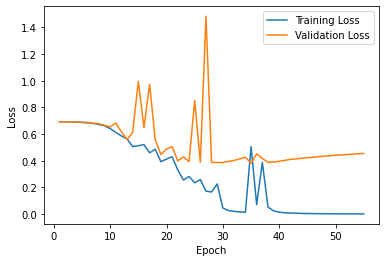

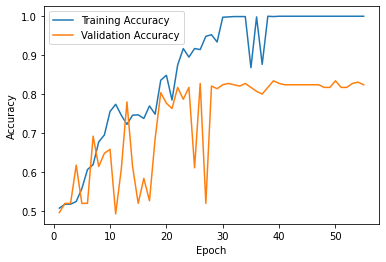

In [11]:
# Base model training
t0 = time.time() # start time
num_epochs = 55 # epochs

history = nn_model.fit(X_train_tfidf.toarray(),y_train,epochs=num_epochs,verbose=0,validation_split=0.2,callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))
history.history.keys()

# Visualize to distinguish trends easier
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This cell will be used as a record of results from the base model, and for any of the variations, in order to provide a record between runs and track any adaptations made from the base model to further models. Gridsearch was not done as I found it easier to go without it in this model scenrario in order to: better keep track of varibles, keep model generation down alongside computing time and resources (due to all the various combinations all hyperparameters of the problem statement would generate), and have minimal headache when doing some custom hyperparameter pairings like the TDIDF vectorization min-max thresholds or the model layers/units per layer.

Reports will be the final train_loss, train_acc, val_loss, val_acc, (test_loss, test_acc) and any notes such as plateaus.

_Base model_: 0.0011, 1.0000, 0.6499, 0.7872; Values separate at 10-20 epochs, plateau around 30 epochs for ~0.0, 1.0000, 0.6-0.7, 0.75-80 (Run 2: 0.8-0.84)

Results for differing splits:

_0.1_: 0.0010, 1.0000, 0.4991, 0.8254; Values separate at 10-20 epochs, plateau around 30 epochs for ~0.0, 1.0000, 0.4-0.5, 0.75-80 (Run 2: 0.83-0.86)

_0.15_: 0.0009, 1.0000, 0.5415, 0.8244; Values separate at 10-20 epochs, plateau around 30 epochs for ~0.0, 1.0000, 0.4-0.5, 0.75-80 (Run 2: 0.8-0.82)

_0.2_: 0.0011, 1.0000, 0.5299, 0.8196; Values separate at 10-20 epochs, plateau around 35 epochs for ~0.0, 1.0000, 0.4-0.5, 0.75-80 (Run 2: 0.81-0.83)

_0.3_: 0.0011, 1.0000, 0.4447, 0.8484; Values separate at 10-20 epochs, plateau around 30 epochs for ~0.0, 1.0000, 0.4-0.5, 0.84-85 (Run 2: 0.79-0.81)

_0.35_: 0.0632,0.9971, 0.4021, 0.8171; Values separate at 10-20 epochs, past ~30 epochs fluxuates but slightly improves for 0.0-0.5, 0.8-1, 0.4-0.5, 0.75-85 (Run 2: 0.84-0.86)

_0.4_: 0.0018, 1.0000, 0.5859, 0.8017; Values separate at 10-20 epochs, plateau around 40 epochs for ~0.0, 1.0000, 0.5-0.6, 0.75-80 (Run 2: 0.81-0.84)

-> Results generally don't vary greatly by split consistently between runs (or within a run), so the base 0.25 split will be used for furhter models.

Results for different n-grams and thresholds (min-max 1-1/0.8-1/0.6-1/0.5-1/0.6-0.8/0.5-0.75):

_1,1, default_ : 0.0013, 1.0000, 0.4971, 0.8277, 0.5948379039764404, 0.8238866329193115; plateau around 35 epochs for ~0, 1.0000, 0.4-5, 0.81-84 (2nd run: 0.0011, 1.0000, 0.4610, 0.8311, 0.55674809217453, 0.8259109258651733)

_1,2, default_ : 0.0017, 1.0000, 0.3207, 0.8682, 0.415296733379364, 0.8218623399734497; plataeu around 40 epochs for ~0, 1.0000, 0.32-34, 0.86-88

_1,3, default_ : 0.0011, 1.0000, 0.3407, 0.8547, 0.41139858961105347, 0.8178137540817261; plataeu around epochs for ~0, 1.0000, 0.34-37, 0.82-86

_1,1, 0.8-1_ : 0.6766, 0.5672, 0.6735, 0.5878, 0.6912689805030823, 0.52226722240448

_1,2, 0.8-1_ : 0.6742, 0.5680, 0.6735, 0.6182, 0.6824710369110107, 0.5890688300132751

_1,3, 0.8-1_ : 0.6744, 0.5630, 0.6736, 0.5777, 0.6874020099639893, 0.5364372730255127

_1,1, 0.6-1_ : 0.6489, 0.6171, 0.6758, 0.5743, 0.6766079068183899, 0.591093122959137

_1,2, 0.6-1_ : 0.6547, 0.6272, 0.6777, 0.5743, 0.6881124377250671, 0.5668016076087952

_1,3, 0.6-1_ : 0.6394, 0.6281, 0.6769, 0.5709, 0.6905640959739685, 0.5546558499336243

_1,1, 0.5-1_ : 0.6074, 0.6729, 0.6326, 0.6216, 0.6616680026054382, 0.6295546293258667

_1,2, 0.5-1_ : 0.6153, 0.6686, 0.6618, 0.6081, 0.6705589294433594, 0.623481810092926

_1,3, 0.5-1_ : 0.6118, 0.6551, 0.6564, 0.5912, 0.6620197296142578, 0.6214575171470642

_1,1, 0.6-0.8_ : 0.6656, 0.5968, 0.6883, 0.5372, 0.6846391558647156, 0.5607287287712097

_1,2, 0.6-0.8_ : 0.6655, 0.5917, 0.7071, 0.5338, 0.690625786781311, 0.546558678150177

_1,3, 0.6-0.8_ : 0.6633, 0.5976, 0.6886, 0.5473, 0.6873632073402405, 0.5566801428794861

_1,1, 0.5-0.75_ : 0.6423, 0.6357, 0.6604, 0.6284, 0.6809400320053101, 0.591093122959137

_1,2, 0.5-0.75_ : 0.6406, 0.6348, 0.6361, 0.6318, 0.676176905632019, 0.5931174159049988

_1,3, 0.5-0.75_ :  0.6358, 0.6238, 0.6512, 0.6520, 0.6822746396064758, 0.5850202441215515

-> N-gram (1,2) with default boundaries seems to have done the best with some significance from the base model, so these settings will be used for future models.

Different model results (different learning rates later):

_1 layer, 64, 25 epoch_ : 0.5626, 0.9552, 0.6460, 0.5743

_1 layer, 64, 55 epoch_ : 0.1392, 1.0000, 0.4371, 0.8446

_1 layer, 64, 75 epoch_ : 0.0576, 1.0000, 0.3858, 0.8480, 0.3845767378807068, 0.8218623399734497

_1 layer, 32, 25 epoch_ : 0.5411, 0.9374, 0.6219, 0.8007

_1 layer, 32, 55 epoch_ : 0.1290, 1.0000, 0.4306, 0.8378

_1 layer, 32, 75 epoch_ : 0.0549, 1.0000, 0.3876, 0.8581, 0.3851461410522461, 0.8218623399734497

_2 layer, 64, 25 epoch_ : 0.3423, 0.8343, 0.5086, 0.7027

_2 layer, 64, 55 epoch_ : 0.0050, 1.0000, 0.3230, 0.8750

_2 layer, 64, 75 epoch_ : 0.0023, 1.0000, 0.3175, 0.8750, 0.38227224349975586, 0.8319838047027588

_2 layer, 32, 25 epoch_ : 0.4032, 0.7675, 0.6275, 0.6047

_2 layer, 32, 55 epoch_ : 0.0050, 1.0000, 0.3209, 0.8784

_2 layer, 32, 75 epoch_ : 0.0024, 1.0000, 0.3143, 0.8784, 0.3861726224422455, 0.829959511756897

_2 layer, 64div2, 25 epoch_ : 0.1928, 0.9484, 1.9607, 0.4662

_2 layer, 64div2, 55 epoch_ : 0.0042, 1.0000, 0.3238, 0.8784

_2 layer, 64div2, 75 epoch_ : 0.0021, 1.0000, 0.3162, 0.8784, 0.3869033753871918, 0.8319838047027588

_3 layer, 64, 25 epoch_ : 0.3032, 0.8833, 0.4414, 0.8176

_3 layer, 64, 55 epoch_ : 0.0016, 1.0000, 0.3148, 0.8615

_3 layer, 64, 75 epoch_ : 0.0006, 1.0000, 0.3165, 0.8649, 0.4256357252597809, 0.829959511756897

_3 layer, 32, 25 epoch_ : 0.3770, 0.8385, 0.4597, 0.8446

_3 layer, 32, 55 epoch_ : 0.0010, 1.0000, 0.3217, 0.8716

_3 layer, 32, 75 epoch_ : 0.0005, 1.0000, 0.3249, 0.8716, 0.43066319823265076, 0.8340080976486206

_3 layer, 64div2, 25 epoch_ : 0.2857, 0.8850, 0.4207, 0.8311

_3 layer, 64div2, 55 epoch_ : 0.0010, 1.0000, 0.3220, 0.8615

_3 layer, 64div2, 75 epoch_ : 0.0005, 1.0000, 0.3241, 0.8615, 0.4426189363002777, 0.8360323905944824

_4 layer, 64, 25 epoch_ : 0.4563, 0.7912, 0.4638, 0.8311

_4 layer, 64, 55 epoch_ : 0.0005, 1.0000, 0.3418, 0.8480

_4 layer, 64, 75 epoch_ : 0.0002, 1.0000, 0.3481, 0.8581, 0.5059154629707336, 0.8319838047027588

_4 layer, 32, 25 epoch_ : 0.2089, 0.9586, 0.3799, 0.8345

_4 layer, 32, 55 epoch_ : 0.0003, 1.0000, 0.3686, 0.8446

_4 layer, 32, 75 epoch_ : 0.0002, 1.0000, 0.3762, 0.8412, 0.5303985476493835, 0.8198380470275879

_4 layer, 64div2, 25 epoch_ : 0.5229, 0.7456, 0.6984, 0.5574

_4 layer, 64div2, 55 epoch_ : 0.0007, 1.0000, 0.3528, 0.8581

_4 layer, 64div2, 75 epoch_ : 0.0003, 1.0000, 0.3624, 0.8615, 0.5087127089500427, 0.8198380470275879

_5 layer, 64, 25 epoch_ : 0.5573, 0.7109, 0.5087, 0.8209

_5 layer, 64, 55 epoch_ : 0.0005, 1.0000, 0.4059, 0.8480

_5 layer, 64, 75 epoch_ : 0.0002, 1.0000, 0.4208, 0.8480, 0.5993213057518005, 0.8238866329193115

_5 layer, 32, 25 epoch_ : 0.6520, 0.6171, 0.7279, 0.4662

_5 layer, 32, 55 epoch_ : 0.0046, 1.0000, 0.3628, 0.8446

_5 layer, 32, 75 epoch_ : 0.0003, 1.0000, 0.4175, 0.8547, 0.6283461451530457, 0.8238866329193115

_5 layer, 64div2, 25 epoch_ : 0.6931, 0.5139, 0.6962, 0.4662

_5 layer, 64div2, 55 epoch_ : 0.6932, 0.5139, 0.6953, 0.4662

_5 layer, 64div2, 75 epoch_ : 0.6930, 0.5139, 0.6945, 0.4662, 0.6933019757270813, 0.5 - This model is literally guessing

-> 75 always seems to overfit or have minimal improvements to loss, while 25 is underfitting, so 55 epochs will be the epoch count for future models. As for ideal models, those with an test accuracy of ~0.83 will be re-tested with different learning rates (all 2 and 3 layer combinations, and 4 layers at all 64 units)

_2 layer, 64, 0.05_ : 0.0271, 1.0000, 0.3612, 0.8716, 0.37170764803886414, 0.8279352188110352

_2 layer, 32, 0.05_ : 0.0227, 1.0000, 0.3527, 0.8514, 0.3682173788547516, 0.8360323905944824

_2 layer, 64div2, 0.05_ : 0.0383, 1.0000, 0.3692, 0.8514, 0.37510454654693604, 0.8380566835403442

_3 layer, 64, 0.05_ : 0.0055, 1.0000, 0.3196, 0.8682, 0.37681838870048523, 0.8360323905944824

_3 layer, 32, 0.05_ : 0.0040, 1.0000, 0.3263, 0.8581, 0.3879223167896271, 0.8238866329193115

_3 layer, 64div2, 0.05_ : 0.0059, 1.0000, 0.3331, 0.8750, 0.3839873969554901, 0.8198380470275879

_4 layer, 64, 0.05_ : 0.0022, 1.0000, 0.3226, 0.8480, 0.40202096104621887 Accuracy:  0.8279352188110352

_2 layer, 64, 0.15_ : 0.0029, 1.0000, 0.3202, 0.8615, 0.38710102438926697, 0.8340080976486206

_2 layer, 32, 0.15_ : 0.0021, 1.0000, 0.3195, 0.8750, 0.3957635164260864, 0.8279352188110352

_2 layer, 64div2, 0.15_ : 0.0022, 1.0000, 0.3215, 0.8649, 0.38867542147636414, 0.829959511756897

_3 layer, 64, 0.15_ : 0.0005, 1.0000, 0.3463, 0.8615, 0.46564406156539917, 0.8340080976486206

_3 layer, 32, 0.15_ : 0.0010, 1.0000, 0.3343, 0.8446, 0.43698909878730774, 0.8259109258651733

_3 layer, 64div2, 0.15_ : 0.0006, 1.0000, 0.3302, 0.8446, 0.44778913259506226, 0.8319838047027588

_4 layer, 64, 0.15_ : 0.0003, 1.0000, 0.3903, 0.8581, 0.5349648594856262, 0.8238866329193115

_2 layer, 64, 0.2_ : 0.0013, 1.0000, 0.3213, 0.8615, 0.40730932354927063, 0.8319838047027588

_2 layer, 32, 0.2_ : 0.0017, 1.0000, 0.3197, 0.8682, 0.4031652808189392, 0.8259109258651733

_2 layer, 64div2, 0.2_ : 0.0014, 1.0000, 0.3162, 0.8514, 0.4100748300552368, 0.8279352188110352

_3 layer, 64, 0.2_ : 0.0005, 1.0000, 0.3390, 0.8615, 0.45594537258148193, 0.829959511756897

_3 layer, 32, 0.2_ : 0.0004, 1.0000, 0.3410, 0.8615, 0.4826275110244751, 0.8319838047027588

_3 layer, 64div2, 0.2_ : 0.4279, 0.8073, 0.4496, 0.8041, 0.435435026884079, 0.8097165822982788

_4 layer, 64, 0.2_ : 0.5240, 0.7354, 0.6538, 0.7297, 0.6488032937049866, 0.7672064900398254

The last base model results were -> 3 layer, 64div2, 55 epoch, n-gram (1,2), default min-max 1-1 : 0.0013, 1.0000, 0.4971, 0.8277, 0.5948379039764404, 0.8238866329193115

However, even with additional strategies to maximize acuracy to new data, accuracy may only be 1-2% higher, which by the problem statement boundary I stated, isn't significantly high enough to be considered a better model regardless of split-train-test division. It was hoped that this threshold could be reached, ideally new data accuracy being ~90%. But further improvements/comparisons include testing for TDIDF thresholds for a general performance curve, trying different vectorization methods, using another keras method to classify the text, combining words based on similar meaning (word winsorization), testing different activation functions for comparison, a true from_logits, and applications of different hyperparameters to the 2-3 neural network layers. 

Additionally, after some of these variations it could be useful to do additional model problems for 1) using a Keras or other python library to create a model that takes in a string up to a certain length and a boolean for a desired review outcome, and based on the review dataset, it generates a review appended to the input string, and 2) a model to search for higher frequencies of certain titles, authors, and publishers, and evaluate if reviews are more biased for or against these works or groups.

See the code below for the various additional models used to gather the results recorded above:

In [12]:
# First, get the different test splits
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.1)
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.15)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X,y,test_size=0.2)
print(X_train3.shape)
print(X_test3.shape)
print(y_train3.shape)
print(y_test3.shape)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X,y,test_size=0.3)
print(X_train4.shape)
print(X_test4.shape)
print(y_train4.shape)
print(y_test4.shape)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X,y,test_size=0.35)
print(X_train5.shape)
print(X_test5.shape)
print(y_train5.shape)
print(y_test5.shape)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X,y,test_size=0.4)
print(X_train6.shape)
print(X_test6.shape)
print(y_train6.shape)
print(y_test6.shape)

(1775,)
(198,)
(1775,)
(198,)
(1677,)
(296,)
(1677,)
(296,)
(1578,)
(395,)
(1578,)
(395,)
(1381,)
(592,)
(1381,)
(592,)
(1282,)
(691,)
(1282,)
(691,)
(1183,)
(790,)
(1183,)
(790,)


(1775, 20326)
(198, 20326)
20326
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiL1 (Dense)                 (None, 64)                1300928   
_________________________________________________________________
hiL2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
hiL3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 1,303,553
Trainable params: 1,303,553
Non-trainable params: 0
_________________________________________________________________
Epoch [5/ 55], Loss: 0.6819, Accuracy: 0.6366, Val_loss: 0.6820, Val_accuracy: 0.7465
Epoch [10/ 55], Loss: 0.5805, Accuracy: 0.7120, Val_loss: 0.5656, Val_accuracy: 0.7859
Epoch [15/ 55], Loss: 0.4721, Accura

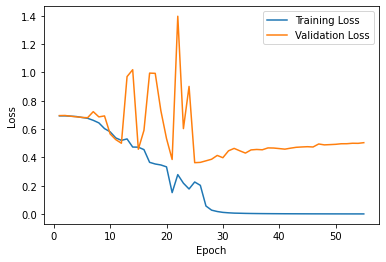

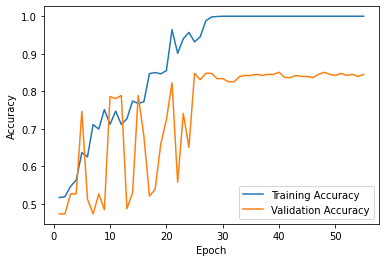

In [13]:
# Will reuse the same model variable for memory's sake/making assumption that
# model splits for a given retrain will not severely impact model performance
# for this given data set.
#0.1 split
tfidf_vectorizer1 = TfidfVectorizer()
tfidf_vectorizer1.fit(X_train1)
X_train1_tfidf = tfidf_vectorizer1.transform(X_train1)
X_test1_tfidf = tfidf_vectorizer1.transform(X_test1)
print(X_train1_tfidf.shape)
print(X_test1_tfidf.shape)
vocabulary_size1 = len(tfidf_vectorizer1.vocabulary_)
print(vocabulary_size1)

nn_model = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape = vocabulary_size1,name="input")
nn_model.add(input_layer)
hidden_layer1 = keras.layers.Dense(units=64, activation="ReLU",name="hiL1")
nn_model.add(hidden_layer1)
hidden_layer2 = keras.layers.Dense(units=32, activation="ReLU",name="hiL2")
nn_model.add(hidden_layer2)
hidden_layer3 = keras.layers.Dense(units=16, activation="ReLU",name="hiL3")
nn_model.add(hidden_layer3)
output = keras.layers.Dense(units=1, activation="sigmoid",name="output")
nn_model.add(output)
nn_model.summary()
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

t0 = time.time() # start time
num_epochs = 55 # epochs

history = nn_model.fit(X_train1_tfidf.toarray(),y_train1,epochs=num_epochs,verbose=0,validation_split=0.2,callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))
history.history.keys()

# Visualize to distinguish trends easier
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(1677, 19915)
(296, 19915)
19915
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiL1 (Dense)                 (None, 64)                1274624   
_________________________________________________________________
hiL2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
hiL3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 1,277,249
Trainable params: 1,277,249
Non-trainable params: 0
_________________________________________________________________
Epoch [5/ 55], Loss: 0.6763, Accuracy: 0.5936, Val_loss: 0.6779, Val_accuracy: 0.7262
Epoch [10/ 55], Loss: 0.5341, Accuracy: 0.7420, Val_loss: 0.8819, Val_accuracy: 0.4762
Epoch [15/ 55], Loss: 0.4248, Accura

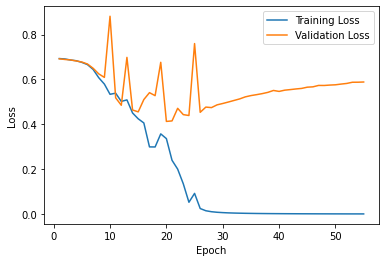

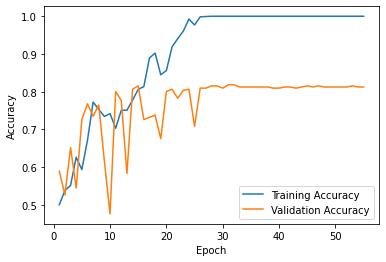

In [14]:
# 0.15 split
tfidf_vectorizer2 = TfidfVectorizer()
tfidf_vectorizer2.fit(X_train2)
X_train2_tfidf = tfidf_vectorizer2.transform(X_train2)
X_test2_tfidf = tfidf_vectorizer2.transform(X_test2)
print(X_train2_tfidf.shape)
print(X_test2_tfidf.shape)
vocabulary_size2 = len(tfidf_vectorizer2.vocabulary_)
print(vocabulary_size2)

nn_model = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape = vocabulary_size2,name="input")
nn_model.add(input_layer)
hidden_layer1 = keras.layers.Dense(units=64, activation="ReLU",name="hiL1")
nn_model.add(hidden_layer1)
hidden_layer2 = keras.layers.Dense(units=32, activation="ReLU",name="hiL2")
nn_model.add(hidden_layer2)
hidden_layer3 = keras.layers.Dense(units=16, activation="ReLU",name="hiL3")
nn_model.add(hidden_layer3)
output = keras.layers.Dense(units=1, activation="sigmoid",name="output")
nn_model.add(output)
nn_model.summary()
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

t0 = time.time() # start time
num_epochs = 55 # epochs

history = nn_model.fit(X_train2_tfidf.toarray(),y_train2,epochs=num_epochs,verbose=0,validation_split=0.2,callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))
history.history.keys()

# Visualize to distinguish trends easier
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(1578, 19054)
(395, 19054)
19054
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiL1 (Dense)                 (None, 64)                1219520   
_________________________________________________________________
hiL2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
hiL3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 1,222,145
Trainable params: 1,222,145
Non-trainable params: 0
_________________________________________________________________
Epoch [5/ 55], Loss: 0.6909, Accuracy: 0.5135, Val_loss: 0.6905, Val_accuracy: 0.5538
Epoch [10/ 55], Loss: 0.6661, Accuracy: 0.6838, Val_loss: 0.6738, Val_accuracy: 0.5158
Epoch [15/ 55], Loss: 0.5185, Accura

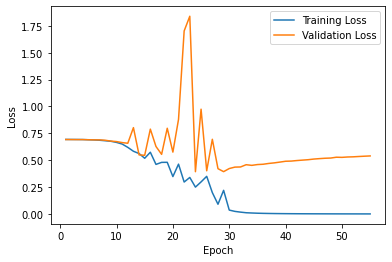

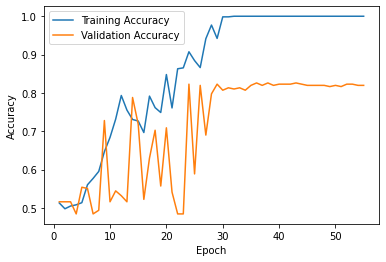

In [15]:
# 0.2 split
tfidf_vectorizer3 = TfidfVectorizer()
tfidf_vectorizer3.fit(X_train3)
X_train3_tfidf = tfidf_vectorizer3.transform(X_train3)
X_test3_tfidf = tfidf_vectorizer3.transform(X_test3)
print(X_train3_tfidf.shape)
print(X_test3_tfidf.shape)
vocabulary_size3 = len(tfidf_vectorizer3.vocabulary_)
print(vocabulary_size3)

nn_model = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape = vocabulary_size3,name="input")
nn_model.add(input_layer)
hidden_layer1 = keras.layers.Dense(units=64, activation="ReLU",name="hiL1")
nn_model.add(hidden_layer1)
hidden_layer2 = keras.layers.Dense(units=32, activation="ReLU",name="hiL2")
nn_model.add(hidden_layer2)
hidden_layer3 = keras.layers.Dense(units=16, activation="ReLU",name="hiL3")
nn_model.add(hidden_layer3)
output = keras.layers.Dense(units=1, activation="sigmoid",name="output")
nn_model.add(output)
nn_model.summary()
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

t0 = time.time() # start time
num_epochs = 55 # epochs

history = nn_model.fit(X_train3_tfidf.toarray(),y_train3,epochs=num_epochs,verbose=0,validation_split=0.2,callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))
history.history.keys()

# Visualize to distinguish trends easier
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(1381, 17778)
(592, 17778)
17778
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiL1 (Dense)                 (None, 64)                1137856   
_________________________________________________________________
hiL2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
hiL3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 1,140,481
Trainable params: 1,140,481
Non-trainable params: 0
_________________________________________________________________
Epoch [5/ 55], Loss: 0.6929, Accuracy: 0.5091, Val_loss: 0.6931, Val_accuracy: 0.4874
Epoch [10/ 55], Loss: 0.6843, Accuracy: 0.5679, Val_loss: 0.6898, Val_accuracy: 0.4874
Epoch [15/ 55], Loss: 0.6337, Accura

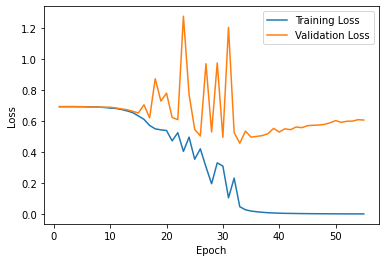

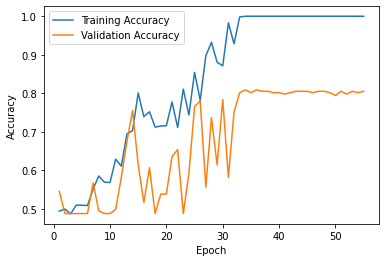

In [16]:
# 0.3 split
tfidf_vectorizer4 = TfidfVectorizer()
tfidf_vectorizer4.fit(X_train4)
X_train4_tfidf = tfidf_vectorizer4.transform(X_train4)
X_test4_tfidf = tfidf_vectorizer4.transform(X_test4)
print(X_train4_tfidf.shape)
print(X_test4_tfidf.shape)
vocabulary_size4 = len(tfidf_vectorizer4.vocabulary_)
print(vocabulary_size4)

nn_model = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape = vocabulary_size4,name="input")
nn_model.add(input_layer)
hidden_layer1 = keras.layers.Dense(units=64, activation="ReLU",name="hiL1")
nn_model.add(hidden_layer1)
hidden_layer2 = keras.layers.Dense(units=32, activation="ReLU",name="hiL2")
nn_model.add(hidden_layer2)
hidden_layer3 = keras.layers.Dense(units=16, activation="ReLU",name="hiL3")
nn_model.add(hidden_layer3)
output = keras.layers.Dense(units=1, activation="sigmoid",name="output")
nn_model.add(output)
nn_model.summary()
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

t0 = time.time() # start time
num_epochs = 55 # epochs

history = nn_model.fit(X_train4_tfidf.toarray(),y_train4,epochs=num_epochs,verbose=0,validation_split=0.2,callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))
history.history.keys()

# Visualize to distinguish trends easier
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(1282, 17315)
(691, 17315)
17315
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiL1 (Dense)                 (None, 64)                1108224   
_________________________________________________________________
hiL2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
hiL3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 1,110,849
Trainable params: 1,110,849
Non-trainable params: 0
_________________________________________________________________
Epoch [5/ 55], Loss: 0.6938, Accuracy: 0.4995, Val_loss: 0.6908, Val_accuracy: 0.5331
Epoch [10/ 55], Loss: 0.6873, Accuracy: 0.5766, Val_loss: 0.7037, Val_accuracy: 0.4669
Epoch [15/ 55], Loss: 0.6511, Accura

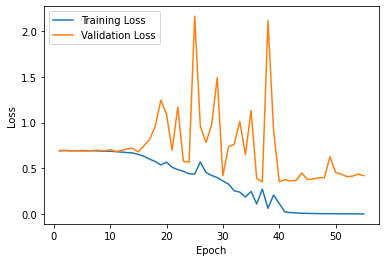

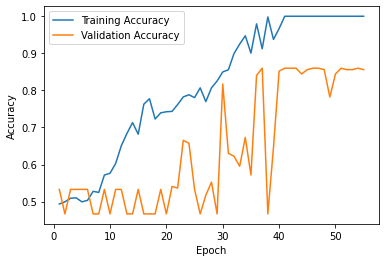

In [17]:
# 0.35 split
tfidf_vectorizer5 = TfidfVectorizer()
tfidf_vectorizer5.fit(X_train5)
X_train5_tfidf = tfidf_vectorizer5.transform(X_train5)
X_test5_tfidf = tfidf_vectorizer5.transform(X_test5)
print(X_train5_tfidf.shape)
print(X_test5_tfidf.shape)
vocabulary_size5 = len(tfidf_vectorizer5.vocabulary_)
print(vocabulary_size5)

nn_model = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape = vocabulary_size5,name="input")
nn_model.add(input_layer)
hidden_layer1 = keras.layers.Dense(units=64, activation="ReLU",name="hiL1")
nn_model.add(hidden_layer1)
hidden_layer2 = keras.layers.Dense(units=32, activation="ReLU",name="hiL2")
nn_model.add(hidden_layer2)
hidden_layer3 = keras.layers.Dense(units=16, activation="ReLU",name="hiL3")
nn_model.add(hidden_layer3)
output = keras.layers.Dense(units=1, activation="sigmoid",name="output")
nn_model.add(output)
nn_model.summary()
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

t0 = time.time() # start time
num_epochs = 55 # epochs

history = nn_model.fit(X_train5_tfidf.toarray(),y_train5,epochs=num_epochs,verbose=0,validation_split=0.2,callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))
history.history.keys()

# Visualize to distinguish trends easier
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(1183, 16611)
(790, 16611)
16611
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiL1 (Dense)                 (None, 64)                1063168   
_________________________________________________________________
hiL2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
hiL3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 1,065,793
Trainable params: 1,065,793
Non-trainable params: 0
_________________________________________________________________
Epoch [5/ 55], Loss: 0.6889, Accuracy: 0.5624, Val_loss: 0.6884, Val_accuracy: 0.5443
Epoch [10/ 55], Loss: 0.6414, Accuracy: 0.7526, Val_loss: 0.6531, Val_accuracy: 0.7637
Epoch [15/ 55], Loss: 0.5596, Accura

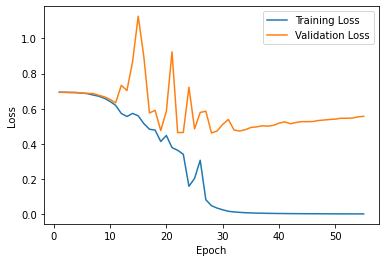

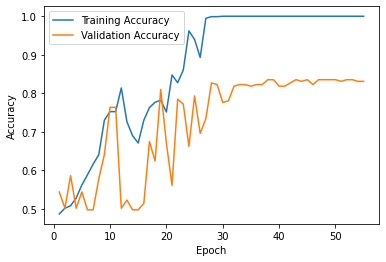

In [18]:
# 0.4 split
tfidf_vectorizer6 = TfidfVectorizer()
tfidf_vectorizer6.fit(X_train6)
X_train6_tfidf = tfidf_vectorizer6.transform(X_train6)
X_test6_tfidf = tfidf_vectorizer6.transform(X_test6)
print(X_train6_tfidf.shape)
print(X_test6_tfidf.shape)
vocabulary_size6 = len(tfidf_vectorizer6.vocabulary_)
print(vocabulary_size6)

nn_model = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape = vocabulary_size6,name="input")
nn_model.add(input_layer)
hidden_layer1 = keras.layers.Dense(units=64, activation="ReLU",name="hiL1")
nn_model.add(hidden_layer1)
hidden_layer2 = keras.layers.Dense(units=32, activation="ReLU",name="hiL2")
nn_model.add(hidden_layer2)
hidden_layer3 = keras.layers.Dense(units=16, activation="ReLU",name="hiL3")
nn_model.add(hidden_layer3)
output = keras.layers.Dense(units=1, activation="sigmoid",name="output")
nn_model.add(output)
nn_model.summary()
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

t0 = time.time() # start time
num_epochs = 55 # epochs

history = nn_model.fit(X_train6_tfidf.toarray(),y_train6,epochs=num_epochs,verbose=0,validation_split=0.2,callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))
history.history.keys()

# Visualize to distinguish trends easier
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Now, different n-grams will be tested, as well as test data will now be used in the evaluation of any further models. Also, separate models will now be used for a given test set to a degree (in case if base model from before was best or not significantly different).

In [12]:
# Retrain for 0.25, and base model test data evaluation
nn_model = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape = vocabulary_size,name="input")
nn_model.add(input_layer)
hidden_layer1 = keras.layers.Dense(units=64, activation="ReLU",name="hiL1")
nn_model.add(hidden_layer1)
hidden_layer2 = keras.layers.Dense(units=32, activation="ReLU",name="hiL2")
nn_model.add(hidden_layer2)
hidden_layer3 = keras.layers.Dense(units=16, activation="ReLU",name="hiL3")
nn_model.add(hidden_layer3)
output = keras.layers.Dense(units=1, activation="sigmoid",name="output")
nn_model.add(output)
nn_model.summary()
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

t0 = time.time() # start time
num_epochs = 55 # epochs

history = nn_model.fit(X_train_tfidf.toarray(),y_train,epochs=num_epochs,verbose=0,validation_split=0.2,callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))

loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test, verbose=0)
print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiL1 (Dense)                 (None, 64)                1194048   
_________________________________________________________________
hiL2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
hiL3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 1,196,673
Trainable params: 1,196,673
Non-trainable params: 0
_________________________________________________________________


2025-07-29 17:07:39.367238: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2025-07-29 17:07:39.371342: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2650000000 Hz


Epoch [5/ 55], Loss: 0.6841, Accuracy: 0.5647, Val_loss: 0.6856, Val_accuracy: 0.6419
Epoch [10/ 55], Loss: 0.6009, Accuracy: 0.7388, Val_loss: 0.6089, Val_accuracy: 0.7736
Epoch [15/ 55], Loss: 0.5457, Accuracy: 0.6965, Val_loss: 0.9027, Val_accuracy: 0.4764
Epoch [20/ 55], Loss: 0.3844, Accuracy: 0.8225, Val_loss: 0.4379, Val_accuracy: 0.7872
Epoch [25/ 55], Loss: 0.0805, Accuracy: 0.9848, Val_loss: 0.4116, Val_accuracy: 0.8142
Epoch [30/ 55], Loss: 0.0136, Accuracy: 0.9992, Val_loss: 0.3974, Val_accuracy: 0.8514
Epoch [35/ 55], Loss: 0.0049, Accuracy: 1.0000, Val_loss: 0.4147, Val_accuracy: 0.8480
Epoch [40/ 55], Loss: 0.0027, Accuracy: 1.0000, Val_loss: 0.4375, Val_accuracy: 0.8277
Epoch [45/ 55], Loss: 0.0018, Accuracy: 1.0000, Val_loss: 0.4441, Val_accuracy: 0.8311
Epoch [50/ 55], Loss: 0.0014, Accuracy: 1.0000, Val_loss: 0.4517, Val_accuracy: 0.8412
Epoch [55/ 55], Loss: 0.0011, Accuracy: 1.0000, Val_loss: 0.4610, Val_accuracy: 0.8311
Elapsed time: 6.60s
Loss:  0.55674809217453 

In [15]:
# N-gram (1,2)
tfidf_vectorizer1 = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer1.fit(X_train)
X_train1_tfidf = tfidf_vectorizer1.transform(X_train)
X_test1_tfidf = tfidf_vectorizer1.transform(X_test)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
vocabulary_size1 = len(tfidf_vectorizer1.vocabulary_)
print(vocabulary_size1)

nn_model1 = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape = vocabulary_size1,name="input")
nn_model1.add(input_layer)
hidden_layer1 = keras.layers.Dense(units=64, activation="ReLU",name="hiL1")
nn_model1.add(hidden_layer1)
hidden_layer2 = keras.layers.Dense(units=32, activation="ReLU",name="hiL2")
nn_model1.add(hidden_layer2)
hidden_layer3 = keras.layers.Dense(units=16, activation="ReLU",name="hiL3")
nn_model1.add(hidden_layer3)
output = keras.layers.Dense(units=1, activation="sigmoid",name="output")
nn_model1.add(output)
nn_model1.summary()
nn_model1.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

t0 = time.time() # start time
num_epochs = 55 # epochs

history = nn_model1.fit(X_train1_tfidf.toarray(),y_train,epochs=num_epochs,verbose=0,validation_split=0.2,callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))

loss1, accuracy1 = nn_model1.evaluate(X_test1_tfidf.toarray(), y_test, verbose=0)
print('Loss: ', str(loss1) , 'Accuracy: ', str(accuracy1))

(1479, 18656)
(494, 18656)
138793
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiL1 (Dense)                 (None, 64)                8882816   
_________________________________________________________________
hiL2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
hiL3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 8,885,441
Trainable params: 8,885,441
Non-trainable params: 0
_________________________________________________________________
Epoch [5/ 55], Loss: 0.6929, Accuracy: 0.5139, Val_loss: 0.6947, Val_accuracy: 0.4662
Epoch [10/ 55], Loss: 0.6912, Accuracy: 0.5199, Val_loss: 0.6927, Val_accuracy: 0.4662
Epoch [15/ 55], Loss: 0.6864, Accur

In [16]:
# N-gram (1,3)
tfidf_vectorizer2 = TfidfVectorizer(ngram_range=(1,3))
tfidf_vectorizer2.fit(X_train)
X_train2_tfidf = tfidf_vectorizer2.transform(X_train)
X_test2_tfidf = tfidf_vectorizer2.transform(X_test)
print(X_train2_tfidf.shape)
print(X_test2_tfidf.shape)
vocabulary_size2 = len(tfidf_vectorizer2.vocabulary_)
print(vocabulary_size2)

nn_model2 = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape = vocabulary_size2,name="input")
nn_model2.add(input_layer)
hidden_layer1 = keras.layers.Dense(units=64, activation="ReLU",name="hiL1")
nn_model2.add(hidden_layer1)
hidden_layer2 = keras.layers.Dense(units=32, activation="ReLU",name="hiL2")
nn_model2.add(hidden_layer2)
hidden_layer3 = keras.layers.Dense(units=16, activation="ReLU",name="hiL3")
nn_model2.add(hidden_layer3)
output = keras.layers.Dense(units=1, activation="sigmoid",name="output")
nn_model2.add(output)
nn_model2.summary()
nn_model2.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

t0 = time.time() # start time
num_epochs = 55 # epochs

history = nn_model2.fit(X_train2_tfidf.toarray(),y_train,epochs=num_epochs,verbose=0,validation_split=0.2,callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))

loss2, accuracy2 = nn_model2.evaluate(X_test2_tfidf.toarray(), y_test, verbose=0)
print('Loss: ', str(loss2) , 'Accuracy: ', str(accuracy2))

(1479, 330072)
(494, 330072)
330072
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiL1 (Dense)                 (None, 64)                21124672  
_________________________________________________________________
hiL2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
hiL3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 21,127,297
Trainable params: 21,127,297
Non-trainable params: 0
_________________________________________________________________


2025-07-29 17:17:44.079827: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1561900704 exceeds 10% of free system memory.


Epoch [5/ 55], Loss: 0.6925, Accuracy: 0.5139, Val_loss: 0.6937, Val_accuracy: 0.4662
Epoch [10/ 55], Loss: 0.6849, Accuracy: 0.5672, Val_loss: 0.6900, Val_accuracy: 0.6959
Epoch [15/ 55], Loss: 0.6431, Accuracy: 0.7058, Val_loss: 0.6802, Val_accuracy: 0.4662
Epoch [20/ 55], Loss: 0.5296, Accuracy: 0.7075, Val_loss: 0.5900, Val_accuracy: 0.6655
Epoch [25/ 55], Loss: 0.4065, Accuracy: 0.8242, Val_loss: 1.3048, Val_accuracy: 0.5338
Epoch [30/ 55], Loss: 0.1524, Accuracy: 0.9586, Val_loss: 0.4190, Val_accuracy: 0.8277
Epoch [35/ 55], Loss: 0.0090, Accuracy: 1.0000, Val_loss: 0.3639, Val_accuracy: 0.8378
Epoch [40/ 55], Loss: 0.0038, Accuracy: 1.0000, Val_loss: 0.3491, Val_accuracy: 0.8378
Epoch [45/ 55], Loss: 0.0022, Accuracy: 1.0000, Val_loss: 0.3436, Val_accuracy: 0.8412
Epoch [50/ 55], Loss: 0.0015, Accuracy: 1.0000, Val_loss: 0.3406, Val_accuracy: 0.8378
Epoch [55/ 55], Loss: 0.0011, Accuracy: 1.0000, Val_loss: 0.3407, Val_accuracy: 0.8547
Elapsed time: 91.49s
Loss:  0.41139858961105

In [24]:
# N-gram (1,1) for min-max 0.5,0.6,0.8-1
tfidf_vectorizer = TfidfVectorizer(min_df=0.5)
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
vocabulary_size = len(tfidf_vectorizer.vocabulary_)
print(vocabulary_size)

nn_model = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape = vocabulary_size,name="input")
nn_model.add(input_layer)
hidden_layer1 = keras.layers.Dense(units=64, activation="ReLU",name="hiL1")
nn_model.add(hidden_layer1)
hidden_layer2 = keras.layers.Dense(units=32, activation="ReLU",name="hiL2")
nn_model.add(hidden_layer2)
hidden_layer3 = keras.layers.Dense(units=16, activation="ReLU",name="hiL3")
nn_model.add(hidden_layer3)
output = keras.layers.Dense(units=1, activation="sigmoid",name="output")
nn_model.add(output)
nn_model.summary()
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

t0 = time.time() # start time
num_epochs = 55 # epochs

history = nn_model.fit(X_train_tfidf.toarray(),y_train,epochs=num_epochs,verbose=0,validation_split=0.2,callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))

loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test, verbose=0)
print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

(1479, 14)
(494, 14)
14
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiL1 (Dense)                 (None, 64)                960       
_________________________________________________________________
hiL2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
hiL3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________
Epoch [5/ 55], Loss: 0.6776, Accuracy: 0.5841, Val_loss: 0.6871, Val_accuracy: 0.5203
Epoch [10/ 55], Loss: 0.6518, Accuracy: 0.6298, Val_loss: 0.6429, Val_accuracy: 0.6351
Epoch [15/ 55], Loss: 0.6448, Accuracy: 0.6154, Val_

In [25]:
# N-gram (1,2) for min-max 0.5,0.6,0.8-1
tfidf_vectorizer1 = TfidfVectorizer(ngram_range=(1,2), min_df=0.5)
tfidf_vectorizer1.fit(X_train)
X_train1_tfidf = tfidf_vectorizer1.transform(X_train)
X_test1_tfidf = tfidf_vectorizer1.transform(X_test)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
vocabulary_size1 = len(tfidf_vectorizer1.vocabulary_)
print(vocabulary_size1)

nn_model1 = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape = vocabulary_size1,name="input")
nn_model1.add(input_layer)
hidden_layer1 = keras.layers.Dense(units=64, activation="ReLU",name="hiL1")
nn_model1.add(hidden_layer1)
hidden_layer2 = keras.layers.Dense(units=32, activation="ReLU",name="hiL2")
nn_model1.add(hidden_layer2)
hidden_layer3 = keras.layers.Dense(units=16, activation="ReLU",name="hiL3")
nn_model1.add(hidden_layer3)
output = keras.layers.Dense(units=1, activation="sigmoid",name="output")
nn_model1.add(output)
nn_model1.summary()
nn_model1.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

t0 = time.time() # start time
num_epochs = 55 # epochs

history = nn_model1.fit(X_train1_tfidf.toarray(),y_train,epochs=num_epochs,verbose=0,validation_split=0.2,callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))

loss1, accuracy1 = nn_model1.evaluate(X_test1_tfidf.toarray(), y_test, verbose=0)
print('Loss: ', str(loss1) , 'Accuracy: ', str(accuracy1))

(1479, 14)
(494, 14)
15
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiL1 (Dense)                 (None, 64)                1024      
_________________________________________________________________
hiL2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
hiL3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________
Epoch [5/ 55], Loss: 0.6868, Accuracy: 0.5587, Val_loss: 0.6868, Val_accuracy: 0.5878
Epoch [10/ 55], Loss: 0.6710, Accuracy: 0.5968, Val_loss: 0.6698, Val_accuracy: 0.5845
Epoch [15/ 55], Loss: 0.6556, Accuracy: 0.6128, Val_

In [36]:
# N-gram (1,3) for min-max 0.5,0.6,0.8-1
tfidf_vectorizer2 = TfidfVectorizer(ngram_range=(1,3), min_df = 0.5)
tfidf_vectorizer2.fit(X_train)
X_train2_tfidf = tfidf_vectorizer2.transform(X_train)
X_test2_tfidf = tfidf_vectorizer2.transform(X_test)
print(X_train2_tfidf.shape)
print(X_test2_tfidf.shape)
vocabulary_size2 = len(tfidf_vectorizer2.vocabulary_)
print(vocabulary_size2)

nn_model2 = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape = vocabulary_size2,name="input")
nn_model2.add(input_layer)
hidden_layer1 = keras.layers.Dense(units=64, activation="ReLU",name="hiL1")
nn_model2.add(hidden_layer1)
hidden_layer2 = keras.layers.Dense(units=32, activation="ReLU",name="hiL2")
nn_model2.add(hidden_layer2)
hidden_layer3 = keras.layers.Dense(units=16, activation="ReLU",name="hiL3")
nn_model2.add(hidden_layer3)
output = keras.layers.Dense(units=1, activation="sigmoid",name="output")
nn_model2.add(output)
nn_model2.summary()
nn_model2.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

t0 = time.time() # start time
num_epochs = 55 # epochs

history = nn_model2.fit(X_train2_tfidf.toarray(),y_train,epochs=num_epochs,verbose=0,validation_split=0.2,callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))

loss2, accuracy2 = nn_model2.evaluate(X_test2_tfidf.toarray(), y_test, verbose=0)
print('Loss: ', str(loss2) , 'Accuracy: ', str(accuracy2))

(1479, 15)
(494, 15)
15
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiL1 (Dense)                 (None, 64)                1024      
_________________________________________________________________
hiL2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
hiL3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________
Epoch [5/ 55], Loss: 0.6856, Accuracy: 0.5850, Val_loss: 0.6915, Val_accuracy: 0.5101
Epoch [10/ 55], Loss: 0.6702, Accuracy: 0.6027, Val_loss: 0.6717, Val_accuracy: 0.6216
Epoch [15/ 55], Loss: 0.6523, Accuracy: 0.6145, Val_

In [33]:
# N-gram (1,1) for min-max 0.6-0.8, 0.5-0.75 (plus some random numbers to see if there were any number outlyers)
tfidf_vectorizer = TfidfVectorizer(min_df=0.1, max_df = 0.9)
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
vocabulary_size = len(tfidf_vectorizer.vocabulary_)
print(vocabulary_size)

nn_model = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape = vocabulary_size,name="input")
nn_model.add(input_layer)
hidden_layer1 = keras.layers.Dense(units=64, activation="ReLU",name="hiL1")
nn_model.add(hidden_layer1)
hidden_layer2 = keras.layers.Dense(units=32, activation="ReLU",name="hiL2")
nn_model.add(hidden_layer2)
hidden_layer3 = keras.layers.Dense(units=16, activation="ReLU",name="hiL3")
nn_model.add(hidden_layer3)
output = keras.layers.Dense(units=1, activation="sigmoid",name="output")
nn_model.add(output)
nn_model.summary()
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

t0 = time.time() # start time
num_epochs = 55 # epochs

history = nn_model.fit(X_train_tfidf.toarray(),y_train,epochs=num_epochs,verbose=0,validation_split=0.2,callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))

loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test, verbose=0)
print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

(1479, 136)
(494, 136)
136
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiL1 (Dense)                 (None, 64)                8768      
_________________________________________________________________
hiL2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
hiL3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 11,393
Trainable params: 11,393
Non-trainable params: 0
_________________________________________________________________
Epoch [5/ 55], Loss: 0.6851, Accuracy: 0.5968, Val_loss: 0.6869, Val_accuracy: 0.5101
Epoch [10/ 55], Loss: 0.6267, Accuracy: 0.6788, Val_loss: 0.6005, Val_accuracy: 0.7264
Epoch [15/ 55], Loss: 0.5636, Accuracy: 0.7126,

In [35]:
# N-gram (1,2) for min-max 0.6-0.8, 0.5-0.75
tfidf_vectorizer1 = TfidfVectorizer(ngram_range=(1,2), min_df=0.5, max_df=0.75)
tfidf_vectorizer1.fit(X_train)
X_train1_tfidf = tfidf_vectorizer1.transform(X_train)
X_test1_tfidf = tfidf_vectorizer1.transform(X_test)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
vocabulary_size1 = len(tfidf_vectorizer1.vocabulary_)
print(vocabulary_size1)

nn_model1 = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape = vocabulary_size1,name="input")
nn_model1.add(input_layer)
hidden_layer1 = keras.layers.Dense(units=64, activation="ReLU",name="hiL1")
nn_model1.add(hidden_layer1)
hidden_layer2 = keras.layers.Dense(units=32, activation="ReLU",name="hiL2")
nn_model1.add(hidden_layer2)
hidden_layer3 = keras.layers.Dense(units=16, activation="ReLU",name="hiL3")
nn_model1.add(hidden_layer3)
output = keras.layers.Dense(units=1, activation="sigmoid",name="output")
nn_model1.add(output)
nn_model1.summary()
nn_model1.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

t0 = time.time() # start time
num_epochs = 55 # epochs

history = nn_model1.fit(X_train1_tfidf.toarray(),y_train,epochs=num_epochs,verbose=0,validation_split=0.2,callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))

loss1, accuracy1 = nn_model1.evaluate(X_test1_tfidf.toarray(), y_test, verbose=0)
print('Loss: ', str(loss1) , 'Accuracy: ', str(accuracy1))

(1479, 136)
(494, 136)
8
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiL1 (Dense)                 (None, 64)                576       
_________________________________________________________________
hiL2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
hiL3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 3,201
Trainable params: 3,201
Non-trainable params: 0
_________________________________________________________________
Epoch [5/ 55], Loss: 0.6796, Accuracy: 0.5672, Val_loss: 0.6799, Val_accuracy: 0.5980
Epoch [10/ 55], Loss: 0.6624, Accuracy: 0.6095, Val_loss: 0.6682, Val_accuracy: 0.6149
Epoch [15/ 55], Loss: 0.6573, Accuracy: 0.6205, Val

In [38]:
# N-gram (1,3) for min-max 0.6-0.8, 0.5-0.75
tfidf_vectorizer2 = TfidfVectorizer(ngram_range=(1,3), min_df = 0.5, max_df=0.75)
tfidf_vectorizer2.fit(X_train)
X_train2_tfidf = tfidf_vectorizer2.transform(X_train)
X_test2_tfidf = tfidf_vectorizer2.transform(X_test)
print(X_train2_tfidf.shape)
print(X_test2_tfidf.shape)
vocabulary_size2 = len(tfidf_vectorizer2.vocabulary_)
print(vocabulary_size2)

nn_model2 = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape = vocabulary_size2,name="input")
nn_model2.add(input_layer)
hidden_layer1 = keras.layers.Dense(units=64, activation="ReLU",name="hiL1")
nn_model2.add(hidden_layer1)
hidden_layer2 = keras.layers.Dense(units=32, activation="ReLU",name="hiL2")
nn_model2.add(hidden_layer2)
hidden_layer3 = keras.layers.Dense(units=16, activation="ReLU",name="hiL3")
nn_model2.add(hidden_layer3)
output = keras.layers.Dense(units=1, activation="sigmoid",name="output")
nn_model2.add(output)
nn_model2.summary()
nn_model2.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

t0 = time.time() # start time
num_epochs = 55 # epochs

history = nn_model2.fit(X_train2_tfidf.toarray(),y_train,epochs=num_epochs,verbose=0,validation_split=0.2,callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))

loss2, accuracy2 = nn_model2.evaluate(X_test2_tfidf.toarray(), y_test, verbose=0)
print('Loss: ', str(loss2) , 'Accuracy: ', str(accuracy2))

(1479, 8)
(494, 8)
8
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiL1 (Dense)                 (None, 64)                576       
_________________________________________________________________
hiL2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
hiL3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 3,201
Trainable params: 3,201
Non-trainable params: 0
_________________________________________________________________
Epoch [5/ 55], Loss: 0.6735, Accuracy: 0.6095, Val_loss: 0.6753, Val_accuracy: 0.5743
Epoch [10/ 55], Loss: 0.6599, Accuracy: 0.6154, Val_loss: 0.6570, Val_accuracy: 0.6318
Epoch [15/ 55], Loss: 0.6508, Accuracy: 0.6281, Val_los

Now, we'll try different structures for the neural network model as proposed in the problem statement. And, at this notebook length, the different models will be done below for the different specifications (1-5 hidden layers, that all or none have normalization, are all 32/64 or in the 64 div 2 patten, with learning rates of 0.05/0.15/0.2, and epochs of 25 or 75 (will look at past in epoch list rather than reassigning epochs)).

In [39]:
# Rather than redeclaring the cell again, we'll compare to the cell above for n-grams = (1,2) with default 1-1 boundaries.
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
vocabulary_size = len(tfidf_vectorizer.vocabulary_)
print(vocabulary_size)

(1479, 138793)
(494, 138793)
138793


In [76]:
nn_model = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape = vocabulary_size,name="input")
nn_model.add(input_layer)
hidden_layer1 = keras.layers.Dense(units=64, activation="ReLU",name="hiL1")
nn_model.add(hidden_layer1)
hidden_layer2 = keras.layers.Dense(units=32, activation="ReLU",name="hiL2")
nn_model.add(hidden_layer2)
hidden_layer3 = keras.layers.Dense(units=16, activation="ReLU",name="hiL3")
nn_model.add(hidden_layer3)
#hidden_layer4 = keras.layers.Dense(units=64, activation="ReLU",name="hiL4")
#nn_model.add(hidden_layer4)
output = keras.layers.Dense(units=1, activation="sigmoid",name="output")
nn_model.add(output)
nn_model.summary()
sgd_optimizer1 = keras.optimizers.SGD(learning_rate=0.2)
nn_model.compile(optimizer=sgd_optimizer1, loss=loss_fn, metrics=['accuracy'])

t0 = time.time() # start time
num_epochs = 55 # epochs

history = nn_model.fit(X_train_tfidf.toarray(),y_train,epochs=num_epochs,verbose=0,validation_split=0.2,callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))

loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test, verbose=0)
print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiL1 (Dense)                 (None, 64)                8882816   
_________________________________________________________________
hiL2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
hiL3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 8,885,441
Trainable params: 8,885,441
Non-trainable params: 0
_________________________________________________________________
Epoch [5/ 55], Loss: 0.6929, Accuracy: 0.5106, Val_loss: 0.6928, Val_accuracy: 0.6047
Epoch [10/ 55], Loss: 0.6795, Accuracy: 0.5993, Val_loss: 0.6899, Val_accuracy: 0.4662
Epoch [15/ 55], Loss: 0.6060, Accuracy: 0.6881, Val_loss: 0.5765, Va